In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
# import sklearn.metrics import accuracy 
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import torchsummary


In [2]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()



In [3]:
x_train = x_train /255.0
x_test = x_test /255.0

In [4]:
x_train = x_train[1:1000,:,:]
x_test = x_test[1:1000, :,:]

In [5]:
x_train.max()

1.0

In [6]:
x_train.shape

(999, 28, 28)

define model

In [7]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape, hidden_size):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.hidden_size = hidden_size

        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape= shape),
            layers.Flatten(),
            layers.Dense( hidden_size, activation= 'relu' ),
            layers.Dense(latent_dim, activation= 'relu')
        ])

        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape= (latent_dim,) ),
            layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
            layers.Reshape(shape)

        ])

    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded





In [8]:
shape = x_train.shape[1:]
print(shape)
latent_dim = 32
hidden_size = 128
autoencoder = Autoencoder(latent_dim, shape,hidden_size)
autoencoder

(28, 28)


In [9]:
# autoencoder.summary()

In [10]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [11]:
autoencoder.fit(x_train, x_train,
                batch_size=32,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.1261 - val_loss: 0.0817
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0689 - val_loss: 0.0594
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.0511
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0462
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.0417
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0375
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0344 - val_loss: 0.0344
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.0322
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.0313
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0290 - val_loss: 0.0297
Epoch 11/

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

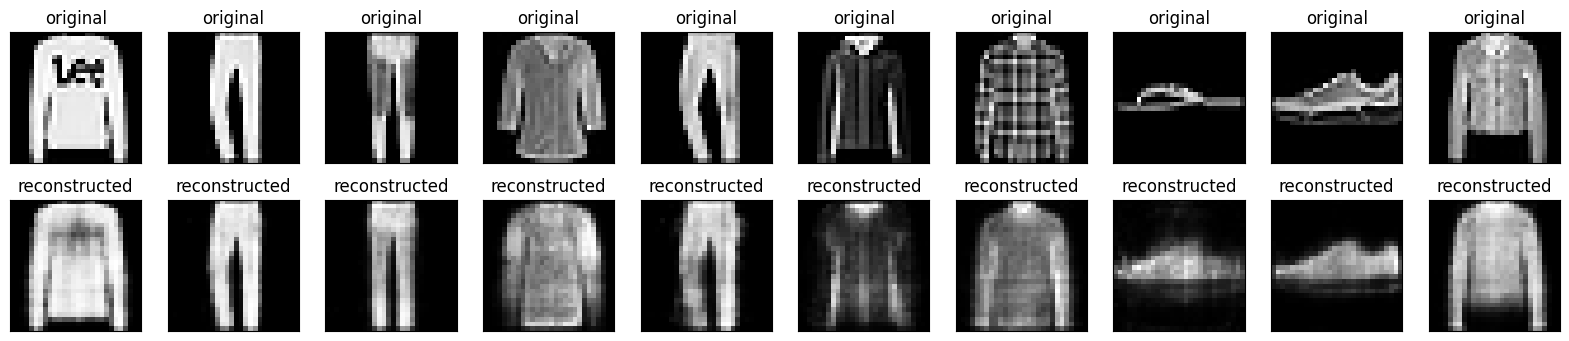

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()